ANALISE EXPLORATÓRIA - NETFLIX E AMAZON PRIME

In [2]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from cycler import cycler
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Parametros Gráfico
rc_params = {'axes.spines.top': False,
             'axes.spines.right': False,
             'legend.fontsize': 8,
             'legend.title_fontsize': 8,
             'legend.loc': 'upper right',
             'legend.fancybox': False,
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12}
sns.set_theme(style='ticks', rc=rc_params)
sns.set_color_codes('muted')

In [4]:
# Base de Dados - Netflix
df_netflix = pd.read_csv('netflix_titles.csv', sep=',')
df_netflix['plataforma'] = 'Netflix'

In [5]:
# Substituindo valores no dataset - Netflix
#df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])

df_netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
df_netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df_netflix.dropna(inplace=True)

# Drop Duplicates
df_netflix.drop_duplicates(inplace= True)
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Netflix
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix


In [6]:
# Verificação do dataset Netflix
check_df = pd.DataFrame({
                    'type': df_netflix.dtypes,
                    'missing': df_netflix.isna().sum(),
                    'size': df_netflix.shape[0],
                    'unique': df_netflix.nunique()})
check_df['percentual_missing'] = round(check_df['missing'] / check_df['size'], 2)
check_df

,type,missing,size,unique,percentual_missing
show_id,object,0,7961,7961,0.0
type,object,0,7961,2,0.0
title,object,0,7961,7961,0.0
director,object,0,7961,4286,0.0
cast,object,0,7961,7093,0.0
country,object,0,7961,748,0.0
date_added,object,0,7961,1733,0.0
release_year,int64,0,7961,73,0.0
rating,object,0,7961,14,0.0
duration,object,0,7961,212,0.0


In [7]:
# Base de Dados - Amazon Prime
df_amazon = pd.read_csv('amazon_prime_titles.csv', sep=',')
df_amazon['plataforma'] = 'Amazon Prime'
df_amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [8]:
# Substituindo valores no dataset - Amazon
df_amazon['country'].replace(np.nan, 'No Data',inplace  = True)
df_amazon['cast'].replace(np.nan, 'No Data',inplace  = True)
df_amazon['director'].replace(np.nan, 'No Data',inplace  = True)

# Drop Duplicates5
df_amazon.drop_duplicates(inplace= True)
df_amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon Prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon Prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon Prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon Prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon Prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [9]:
# Verificação do dataset Amazon
check_df = pd.DataFrame({
                    'type': df_amazon.dtypes,
                    'missing': df_amazon.isna().sum(),
                    'size': df_amazon.shape[0],
                    'unique': df_amazon.nunique()})
check_df['percentual_missing'] = round(check_df['missing'] / check_df['size'], 2)
check_df

,type,missing,size,unique,percentual_missing
show_id,object,0,9668,9668,0.00
type,object,0,9668,2,0.00
title,object,0,9668,9668,0.00
director,object,0,9668,5775,0.00
cast,object,0,9668,7928,0.00
country,object,0,9668,87,0.00
date_added,object,9513,9668,84,0.98
release_year,int64,0,9668,100,0.00
rating,object,337,9668,24,0.03
duration,object,0,9668,219,0.00


In [10]:
# Unificando os datasets
df = pd.concat([df_netflix, df_amazon])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime


In [11]:
# Adicionando coluna de Mês e Ano
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

#Renomeando os Meses
mes= {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8: 
                    'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
df['month_added'] = df['month_added'].replace(mes)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021.0,Setembro
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021.0,Setembro
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021.0,Setembro
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix,2021.0,Setembro
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Netflix,2021.0,Setembro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",No Data,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon Prime,NaN,NaN
9664,s9665,TV Show,Planet Patrol,No Data,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",No Data,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon Prime,NaN,NaN
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",No Data,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon Prime,NaN,NaN
9666,s9667,TV Show,Maradona: Blessed Dream,No Data,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",No Data,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon Prime,NaN,NaN


EDA

In [12]:
# 1- Top 10 atores/atrizes considerando todos os dados
actor = df['cast']
actor = actor.dropna()

new = actor.str.split(', ').tolist()
actor_list = sum(new, [])
actor_list

['No Data',
 'Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel',
 'Natasha Thahane',
 'Arno Greeff',
 'Xolile Tshabalala',
 'Getmore Sithole',
 'Cindy Mahlangu',
 'Ryle De Morny',
 'Greteli Fincham',
 'Sello Maake Ka-Ncube',
 'Odwa Gwanya',
 'Mekaila Mathys',
 'Sandi Schultz',
 'Duane Williams',
 'Shamilla Miller',
 'Patrick Mofokeng',
 'Mayur More',
 'Jitendra Kumar',
 'Ranjan Raj',
 'Alam Khan',
 'Ahsaas Channa',
 'Revathi Pillai',
 'Urvi Singh',
 'Arun Kumar',
 'Kofi Ghanaba',
 'Oyafunmike Ogunlano',
 'Alexandra Duah',
 'Nick Medley',
 'Mutabaruka',
 'Afemo Omilami',
 'Reggie Carter',
 'Mzuri',
 'Mel Giedroyc',
 'Sue Perkins',
 'Mary Berry',
 'Paul Hollywood',
 'Melissa McCarthy',
 "Chris O'Dowd",
 'Kevin Kline',
 'Timothy Olyphant',
 'Daveed Diggs',
 'Skyler Gisondo',
 'Laura Harrier',
 'Rosalind Chao',
 'Kimberly Quinn',
 'Loretta Devine',
 'Ravi Kapoor',
 'Luna Wedler',
 'Jannis Niewöhner',
 'Milan Peschel',
 'Edin Hasanović',
 'Anna Fialová',


In [13]:
df_actor = pd.DataFrame(actor_list, columns=['actors'])
top_10_actor = df_actor.groupby(['actors']).size().sort_values(ascending=False)[1:11]
top_10_actor

actors
Anupam Kher         59
Maggie Binkley      56
Amitabh Bachchan    47
Shah Rukh Khan      45
Akshay Kumar        41
Paresh Rawal        39
Danny Trejo         38
Naseeruddin Shah    38
Nassar              36
Om Puri             35
dtype: int64

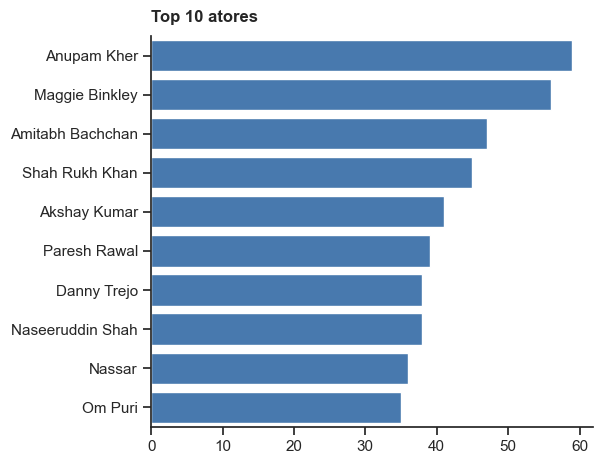

In [14]:
# Gráfico Top 10 atores considerando as duas plataformas
sns.barplot(x=top_10_actor, y=top_10_actor.index, orient='h', color = sns.xkcd_rgb['windows blue'])
plt.title('Top 10 atores', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.xlabel('')
plt.ylabel('')
plt.show()

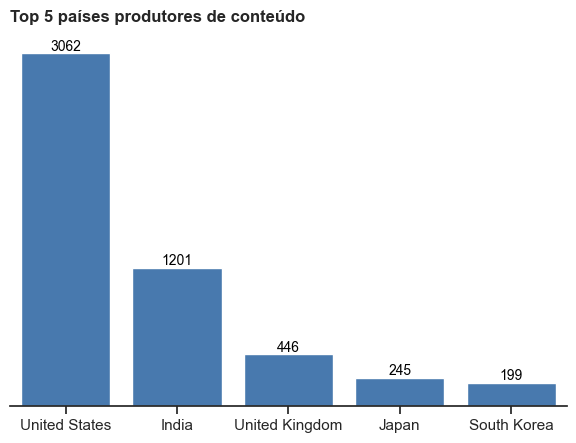

In [15]:
# 2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas
top_5_city = df.groupby(['country']).size().sort_values(ascending=False)[1:6]

ax = sns.barplot(x=top_5_city.index, y=top_5_city, color = sns.xkcd_rgb['windows blue'])
plt.title('Top 5 países produtores de conteúdo', fontsize=12, loc='left', pad=10)

for i in ax.patches:
    h = i.get_height()
    ax.annotate('{:.0f}'.format(h),
                  (i.get_x() + i.get_width()/2, h),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 2),
                  textcoords='offset points')
plt.tight_layout()

for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

plt.yticks([])
plt.xlabel('')
plt.show()

In [16]:
countries = Counter(df_netflix.country)
topcountries = countries.most_common()[0:5]
topcountries

[('United States', 2809),
 ('India', 972),
 ('United Kingdom', 418),
 ('Japan', 243),
 ('South Korea', 199)]

In [17]:
acountry = Counter(df_amazon.country)
atopcountry = acountry.most_common()[1:6]
atopcountry

[('United States', 253),
 ('India', 229),
 ('United Kingdom', 28),
 ('Canada', 16),
 ('United Kingdom, United States', 12)]

In [29]:
# Gráfico Top 5 comparando as duas plataformas

custom_colors = ['#00A8E1', '#D81F26']
customPalette = sns.set_palette(sns.color_palette(custom_colors))

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x = [i[0] for i in topcountries],y = [i[1] for i in topcountries], name = 'Netflix', marker_color='#D81F26'))
fig.add_trace(go.Bar(x = [i[0] for i in atopcountry],y = [i[1] for i in atopcountry], name = 'Amazon Prime', marker_color='#00A8E1'))
fig.update_layout(height=600, width=900, title_text='Top 5 países produtores de conteúdo - Amazon Prime x Netflix', template='plotly_white')

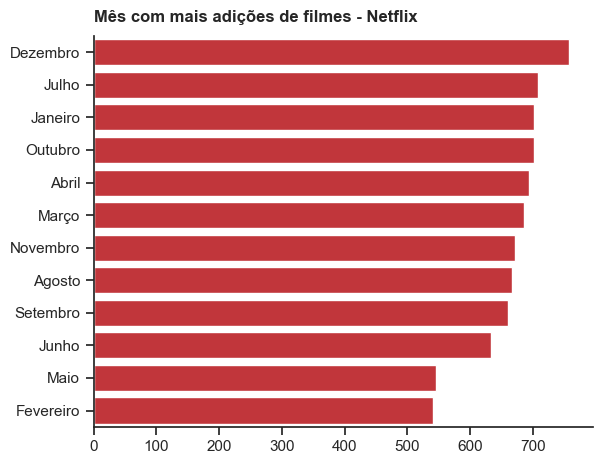

In [19]:
# 3- Mês no qual há mais adições de filmes na plataforma Netflix
add = df[df['plataforma'] == 'Netflix'].groupby(['month_added']).size().sort_values(ascending=False)

sns.barplot(x=add, y=add.index, color = '#D81F26', orient='h')
plt.title('Mês com mais adições de filmes - Netflix', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.xlabel('')
plt.ylabel('')
plt.show()

In [20]:
# 4- Quantidade de filmes listados como comédia
comedy_filme = df[(df.type == 'Movie') & (df.listed_in == 'Comedy')].shape[0]
print('No dataset possui {} filmes listados como comédia.'.format(comedy_filme))

No dataset possui 442 filmes listados como comédia.


In [27]:
# 5- Lista de todos os gêneros de filmes
listed_in_filme = df[(df.type == 'Movie')]['listed_in']
new = listed_in_filme.str.split(', ').to_list()

listed = sum(new, [])

# Eliminar palavras duplicadas em uma lista
resultantList = []
 
for element in listed:
    if element not in resultantList:
        resultantList.append(element)


resultantList = pd.DataFrame(listed, columns = ['genero'])
resultantList = resultantList.drop_duplicates()
resultantList

,genero
0,Documentaries
1,Dramas
2,Independent Movies
3,International Movies
4,Comedies
10,Romantic Movies
12,Horror Movies
13,Sci-Fi & Fantasy
14,Thrillers
15,Action & Adventure


In [28]:
fig = go.Figure(data=[go.Table(header=dict(values=['Lista de todos os gêneros de filmes']),cells=dict(values=[resultantList['genero']]))])
fig.show()

In [23]:
# 6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas
df_tvshow = df[df['type'] == 'TV Show'].groupby(['year_added', 'plataforma']).size().sort_values(ascending=False).reset_index()
df_tvshow.rename(columns = {0: 'total'}, inplace = True)
df_tvshow['year_added'] = df_tvshow['year_added'].astype(int)
df_tvshow

,year_added,plataforma,total
0,2020,Netflix,548
1,2019,Netflix,509
2,2021,Netflix,370
3,2018,Netflix,337
4,2017,Netflix,309
5,2016,Netflix,165
6,2021,Amazon Prime,139
7,2015,Netflix,25
8,2013,Netflix,5
9,2014,Netflix,5


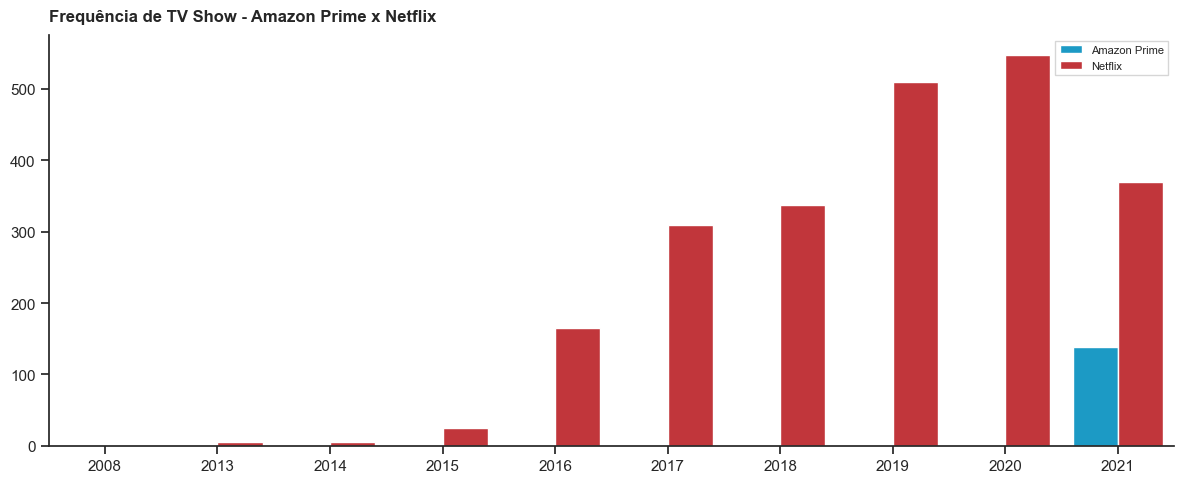

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

sns.barplot(x=df_tvshow.year_added, y=df_tvshow.total, hue=df_tvshow['plataforma'], hue_order=['Amazon Prime', 'Netflix'])
plt.title('Frequência de TV Show - Amazon Prime x Netflix', fontsize=12, loc='left', pad=10)

ax.legend(ncol=1, loc="upper right", frameon=True)

custom_cycler = (cycler(color=['#00A8E1', '#D81F26']))
ax.set_prop_cycle(custom_cycler)

plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [25]:
# 7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas
df_movies = df[df['type'] == 'Movie'].groupby(['year_added', 'plataforma']).size().sort_values(ascending=False).reset_index()
df_movies.rename(columns = {0: 'total'}, inplace = True)
df_movies['year_added'] = df_movies['year_added'].astype(int)
df_movies

,year_added,plataforma,total
0,2019,Netflix,1349
1,2020,Netflix,1223
2,2018,Netflix,1192
3,2017,Netflix,812
4,2021,Netflix,770
5,2016,Netflix,242
6,2015,Netflix,54
7,2014,Netflix,19
8,2021,Amazon Prime,16
9,2011,Netflix,13


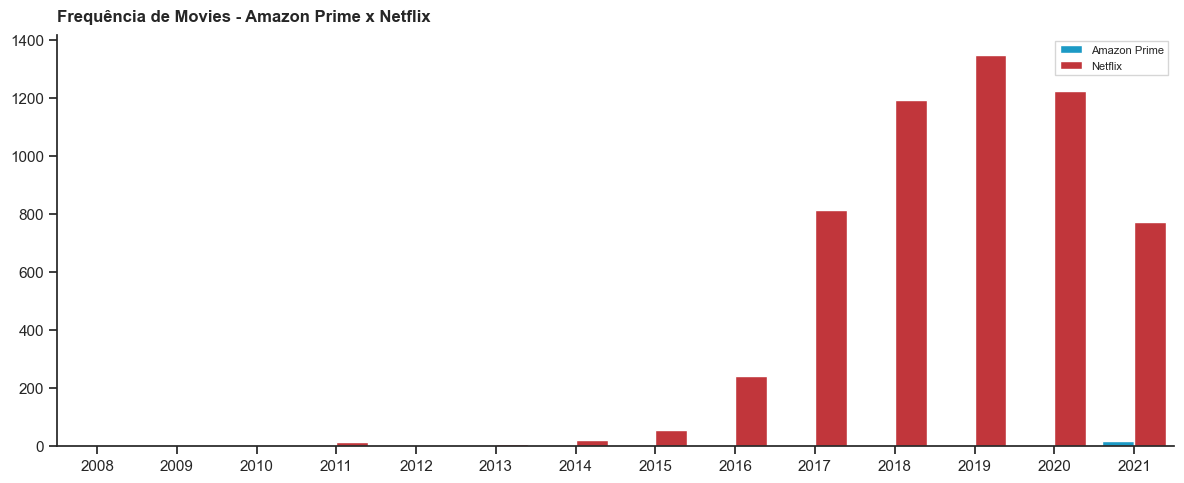

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.barplot(x=df_movies.year_added, y=df_movies.total, hue=df_movies['plataforma'], hue_order=['Amazon Prime', 'Netflix'])
plt.title('Frequência de Movies - Amazon Prime x Netflix', fontsize=12, loc='left', pad=10)

ax.legend(ncol=1, loc="upper right", frameon=True)

plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()